In [1]:
import pandas as pd 
#Preliminary data cleanup and formatting
#Load apple quality data
data = pd.read_csv("./apple_quality.csv")
#Drop any columns with NaN values
data = data.dropna(how='any')
#Set apple ID to be an int
data['A_id'] = data['A_id'].astype(int)
#Set apple ID as index column for reduction of redundant data
data = data.set_index("A_id")


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


X = data.drop("Quality", axis=1)
y = data['Quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)


Accuracy: 0.81625
Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.81      0.82       401
        good       0.81      0.82      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



[Text(0.3333333333333333, 0.9285714285714286, 'Juiciness <= -0.415\ngini = 0.5\nsamples = 3200\nvalue = [1595, 1605]'),
 Text(0.2222222222222222, 0.7857142857142857, 'gini = 0.434\nsamples = 980\nvalue = [668, 312]'),
 Text(0.4444444444444444, 0.7857142857142857, 'Ripeness <= 1.827\ngini = 0.486\nsamples = 2220\nvalue = [927, 1293]'),
 Text(0.2222222222222222, 0.6428571428571429, 'Weight <= -2.095\ngini = 0.44\nsamples = 1731\nvalue = [566, 1165]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.202\nsamples = 342\nvalue = [39, 303]'),
 Text(0.3333333333333333, 0.5, 'Acidity <= -1.757\ngini = 0.471\nsamples = 1389\nvalue = [527, 862]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.213\nsamples = 264\nvalue = [32, 232]'),
 Text(0.4444444444444444, 0.35714285714285715, 'Size <= 0.633\ngini = 0.493\nsamples = 1125\nvalue = [495, 630]'),
 Text(0.3333333333333333, 0.21428571428571427, 'Acidity <= 1.301\ngini = 0.5\nsamples = 773\nvalue = [398, 375]'),
 Text(0.2222222222222222, 0.07142

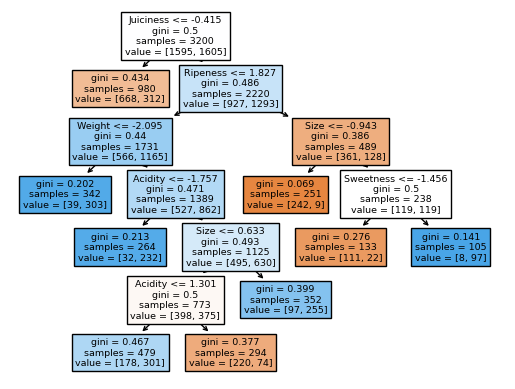

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree model with a high ccp_alpha (initially fully grown tree)
model = DecisionTreeClassifier(ccp_alpha=0.01)

# Fit the model on the training data
model.fit(X_train, y_train)

# Visualize the initial tree
plot_tree(model, filled=True, feature_names=X.columns)


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid including ccp_alpha
param_grid = {
    'ccp_alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Use GridSearchCV to search for the best ccp_alpha
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best ccp_alpha
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

# Fit the model with the best ccp_alpha
pruned_model = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha)
pruned_model.fit(X_train, y_train)

# Make predictions and evaluate the pruned model
pruned_predictions = pruned_model.predict(X_test)
accuracy = accuracy_score(y_test, pruned_predictions)
classification_report_result = classification_report(y_test, pruned_predictions)

# Print the best ccp_alpha and evaluation results
print(f"Best ccp_alpha: {best_ccp_alpha}")
print(f"Accuracy with Pruning: {accuracy}")
print("Classification Report:")
print(classification_report_result)


Best ccp_alpha: 0.001
Accuracy with Pruning: 0.8225
Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.83      0.82       401
        good       0.83      0.81      0.82       399

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800

